In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Stock price series can be difficult to compare directly because they start at different prices
# One solution is to normalise price series to start at level=100
# Future prices are relative to starting point, with the delta quotable in percentage points
# We'll compare 4 asset classes on the basis of normalised series
prices_df = pd.read_csv('data/stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
prices_df.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [3]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [4]:

# Select the first value of each asset; this will correspond to level=100
first_values = prices_df.iloc[0]
print(first_values)

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64


In [5]:

# Normalise the series based on first values and convert to percentage
normalised_df = prices_df.div(first_values).mul(100)
normalised_df.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


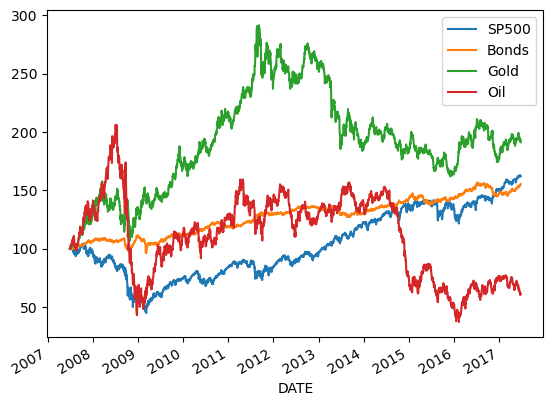

In [6]:
normalised_df.plot()
plt.show()

In [7]:

# We'll also compare 3 stocks to the DJIA
stocks_df = pd.read_csv('data/stock_data/nyse.csv', parse_dates=['date'], index_col='date')
djia_df = pd.read_csv('data/stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

In [8]:
stocks_df.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [9]:
djia_df.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [10]:
data = pd.concat([stocks_df, djia_df], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


In [13]:

first_values = data.iloc[0]
data_normalised_df = data.div(first_values).mul(100)
data_normalised_df.head()

,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,98.840445,101.936989,100.390456,99.887188
2010-01-06,99.644403,102.497083,101.258134,99.902872
2010-01-07,98.933210,104.527421,100.939986,100.216365
2010-01-08,99.273346,104.270712,100.535069,100.323414


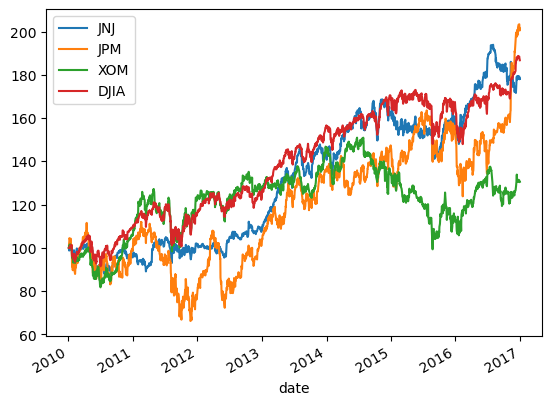

In [14]:
data_normalised_df.plot()
plt.show()